true
      X:
0
5
10
15
20
25
30
35
40
45
50
55
         Y:
10.138718459852619
10.001080115575105
10.029521286178577
10.080130242526401
10.22311811104055
10.241892651534824
10.330629832396754
10.76373882130961
10.66067772844683
10.931084953987705
11.22358626621439
11.473939546125584


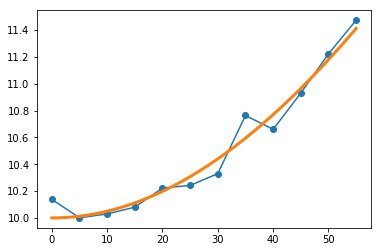

In [82]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from scipy.optimize import root
import sympy

mu,sigma=0,0.1
n=12
u=0.1
y=10
h=5
Y=[0.]*n
X=[0.]*n
t_=np.linspace(0,55,1000)
trueY=[0.]*1000

def trY(u,t,y):
    return sqrt((u*t)**2+y**2)

W=np.random.normal(mu,sigma,n)
if (abs(mu-np.mean(W))<0.01):
        print("true")
print("      X:")    
for k in range(0,n):
    X[k]=h*k
    print X[k]
print("         Y:")
for k in range(0,n):
    Y[k]=trY(u,X[k],y)+W[k]
    print Y[k]

for i in range(0,1000):
    trueY[i]=trY(u,t_[i],y)
    
    
fig=plt.figure()
plt.plot(X,Y,marker='o')
plt.plot(t_,trueY,linewidth=3)


1.0 0.0
1.0 5.0
1.0 10.0
1.0 15.0
1.0 20.0
1.0 25.0
1.0 30.0
1.0 35.0
1.0 40.0
1.0 45.0
1.0 50.0
1.0 55.0
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55.]]
theta: 9.80405592971399286739
	0.02560438442006381099
[[ 2.94871795e-01 -7.69230769e-03]
 [-7.69230769e-03  2.79720280e-04]]
[[0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  

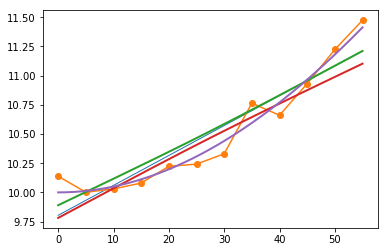

In [83]:
def estY(th1,th2,t):
    return th1+th2*t
def D(t):
    x = complex(*t)
    err=2.797202797202797e-6*x**2 - 0.0001538461538461538*x + 0.002948717948717949
    return [err.real, err.imag]
    
H=np.array([[0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.],
  [0.,0.]])
I=np.eye(n)
disigma=sigma**2


for k in range(0,n):
    H[k][0]=1
    H[k][1]=h*k
    print H[k][0],H[k][1]
    
H_=H.transpose()
print H_
A=H_.dot(H)
A=np.linalg.inv(A)
A=A.dot(H_)
theta=A.dot(Y)
print("theta: %.20f" % theta[0])
print( "\t%.20f" % theta[1])

Hdef=np.linalg.inv(H_.dot(H))
print Hdef


sigI=np.eye(12)
for i in range(0,n):
    sigI[i][i]=I[i][i]*disigma
print sigI

DestYlast3withoutlast_=H.dot(Hdef)
DestYlast3withoutlast=[['']*2]*12
for i in range(n):
    DestYlast3withoutlast[i][0]=str(DestYlast3withoutlast_[i][0])
    DestYlast3withoutlast[i][1]=str(DestYlast3withoutlast_[i][1])
    
DestYlast3=['']*n
for i in range(0,n):
    DestYlast3[i]=DestYlast3withoutlast[i][0]+'+'+'t*'+DestYlast3withoutlast[i][1]   

DestYfirst2=['']*2
for i in range(0,2):
    DestYfirst2[i]=str(Hdef[i][0])+'+'+str(Hdef[i][1])+'*t'

DestYfirst3=['']*n
for i in range(0,n):
    DestYfirst3[i]='('+DestYfirst2[0]+'+('+DestYfirst2[1]+')*'+str(H_[1][i])+')'

DestYfirst4=['']*n
for i in range(0,n):
    DestYfirst4[i]='('+DestYfirst3[i]+')*'+str(disigma)

DestY=''
for i in range(12):
    DestY+=DestYfirst4[i]+'*'+DestYfirst3[i]+'+'
DestY='((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*0.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*0.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*5.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*5.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*10.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*10.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*15.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*15.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*20.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*20.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*25.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*25.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*30.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*30.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*35.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*35.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*40.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*40.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*45.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*45.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*50.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*50.0)+((0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*55.0))*0.01*(0.2948717948717949-0.007692307692307692*t+(-0.007692307692307693+0.0002797202797202797*t)*55.0)'
DestYY=sympy.simplify(DestY)
print DestYY

sol =root(D,[25,17])
print sol.x

Q=np.quantile(np.random.normal(0,1),0.950)
print Q

DoverGran1=str(theta[0])+'+'+str(theta[1])+'*t'+'+'+'sqrt('+str(DestYY)+')'
DoverGran2=str(theta[0])+'+'+str(theta[1])+'*t'+'-'+'sqrt('+str(DestYY)+')'
print DoverGran1
print DoverGran2

DG1=[0.]*1000
DG2=[0.]*1000
DesY=[0.]*1000
for i in range(0,1000):
    DG1[i]=9.835810780763705+0.024010799658660355*t_[i]+sqrt(2.797202797202797e-6*t_[i]**2 - 0.0001538461538461538*t_[i] + 0.002948717948717949)
    DG2[i]=9.835810780763705+0.024010799658660355*t_[i]-sqrt(2.797202797202797e-6*t_[i]**2 - 0.0001538461538461538*t_[i] + 0.002948717948717949)
    DesY[i]=2.797202797202797e-6*t_[i]**2 - 0.0001538461538461538*t_[i] + 0.002948717948717949
    estY_=[0.]*1000
for i in range(0,1000):
    estY_[i]=estY(theta[0],theta[1],t_[i])
fig=plt.figure()
plt.plot(t_,estY_,linewidth=1)
plt.plot(X,Y,marker='o')
plt.plot(t_,DG1,linewidth=2)
plt.plot(t_,DG2,linewidth=2)
plt.plot(t_,trueY,linewidth=2)


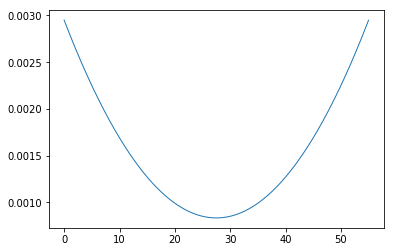

In [84]:
fig=plt.figure()
plt.plot(t_,DesY,linewidth=1)

10.061227335612257
10.063227135652246
10.0692241381697
10.07921116470681
10.093176298799818
10.111102956733147
10.132969985223594
10.158751784703727
10.188418456549988
10.221935972316686
10.259266362797826
10.30036792454842
0.2571714058982639
0.13114928383793512
0.009124364255068684
-0.10891053130813866
-0.2229673193154511
-0.333062583482441
-0.4392174770923134
-0.5414575997124995
-0.6398128499665585
-0.7343172563001783
-0.8250087879193568
-0.911929148269083


(array([2., 1., 1., 1., 2., 1., 1., 1., 1., 1.]),
 array([-0.91192915, -0.79501909, -0.67810904, -0.56119898, -0.44428893,
        -0.32737887, -0.21046882, -0.09355876,  0.0233513 ,  0.14026135,
         0.25717141]),
 <a list of 10 Patch objects>)

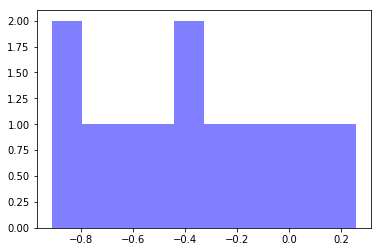

In [85]:
ost=H.dot(theta)
ost2=[0.]*12
Weird1Y=[0.]*n
l=2

for i in range(0,n):
    Weird1Y[i]=trY(u,l*i,y)+W[k]
    print Weird1Y[i]
    
for i in range(0,12):
    ost2[i]=Weird1Y[i]-ost[i]
    print ost2[i]
fig=plt.figure()
plt.hist(ost2,facecolor='blue',alpha=0.5)


[[  1.   0.   0.]
 [  1.   2.   4.]
 [  1.   4.  16.]
 [  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  12. 144.]
 [  1.  14. 196.]
 [  1.  16. 256.]
 [  1.  18. 324.]
 [  1.  20. 400.]
 [  1.  22. 484.]]
[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.]
 [  0.   4.  16.  36.  64. 100. 144. 196. 256. 324. 400. 484.]]
theta: 10.07430585018743229853
	-0.01706401509187716048
	0.00368522618827427009
10.061227335612257
10.063227135652246
10.0692241381697
10.07921116470681
10.093176298799818
10.111102956733147
10.132969985223594
10.158751784703727
10.188418456549988
10.221935972316686
10.259266362797826
10.30036792454842
-0.013078514575175504
0.008308410895471852
0.00421072933738742
-0.02537873770723209
-0.08047190670215087
-0.16108536136294127
-0.26724025497280657
-0.3989621870991833
-0.5562810563656235
-0.7392308912178205
-0.9478496608617721
-1.182179068742462


(array([1., 1., 0., 1., 0., 1., 1., 1., 1., 5.]),
 array([-1.18217907, -1.06313032, -0.94408157, -0.82503282, -0.70598408,
        -0.58693533, -0.46788658, -0.34883783, -0.22978909, -0.11074034,
         0.00830841]),
 <a list of 10 Patch objects>)

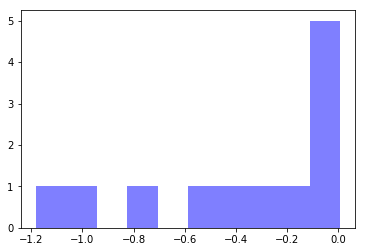

In [86]:
#H3=[[0.]*3]*12
Ost2=[0.]*n
H3=np.array([[0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.]])
w=2
for i in range(0,n):
    H3[i][0]=1
    H3[i][1]=w*i
    H3[i][2]=(w*i)**2
print H3

H3_=H3.transpose()
print H3_
A=H3_.dot(H3)
A=np.linalg.inv(A)
A=A.dot(H3_)
theta2=A.dot(Y)
print("theta: %.20f" % theta2[0])
print( "\t%.20f" % theta2[1])
print( "\t%.20f" % theta2[2])

Ost=H3.dot(theta2)
l=2
Weird3Y=[0.]*12
for i in range(0,n):
    Weird3Y[i]=trY(u,l*i,y)+W[k]
    print Weird3Y[i]
for i in range(0,12):
    Ost2[i]=Weird3Y[i]-Ost[i]
    print Ost2[i]
fig=plt.figure()
plt.hist(Ost2,facecolor='blue',alpha=0.5)